# <p style="text-align:center">Customer <span style="color:red"><b>Churn</b></span> - Predictive Analysis Project Using <span style="color:yellow"><b>Python</b></span></p>

<center><img src="https://slitayem.github.io/img/blog/2020-08-04/churn.png" width="800" height="300"></center>
 
<center>In this notebook we will try to understand the characteristics of the company's customers, how many churned and who churned. Then, using a variety of machine learning algorithms, we will examine the features' correlation with the churn rate before developing a model that forecasts potential future churns.</center>

# [1] Preliminary Actions

In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# define the folder location
path = "C:\\Users\\User\\Desktop\\work\\Python Project"

In [4]:
# use pandas to read the csv
df = pd.read_csv("%s/churn.csv" % path)

In [5]:
# show the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# show the last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# check for duplicate rows (if customerID column's values are completely unique or not)
result = round(df['customerID'].nunique()/len(df['customerID'])*100)
print(f"{result}% of CustomerID rows are UNIQUE! it can be used to uniquely identify each customer.")

100% of CustomerID rows are UNIQUE! it can be used to uniquely identify each customer.


In [8]:
# dataset structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# dataset shape (no. of rows, no. of columns)
df.shape

(7043, 21)

In [10]:
# check the columns' data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# "TotalCharges" data type is "object" even though it has numeric values - let's tranform it
# "errors" is set as ‘coerce’ so invalid values will be set as NaN
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# check for missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# column "TotalCharges" has 11 missing values, let's have a look at their records
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
# tenure=0 and Churn="No"; we decided to tranform the missing values in "TotalCharges" to 0, because they were probably new customers whose payments haven't been charged yet
df['TotalCharges'].fillna(0, inplace = True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
## check column's data types, total unique values and unique values list
for col in df.columns:
    print(col)
    print(f'Data Type: {df[col].dtype}')
    print(f'Total Unique Values: {df[col].nunique()}')
    print(f'Unique Values: {df[col].unique()}\n')

customerID
Data Type: object
Total Unique Values: 7043
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
Data Type: object
Total Unique Values: 2
Unique Values: ['Female' 'Male']

SeniorCitizen
Data Type: int64
Total Unique Values: 2
Unique Values: [0 1]

Partner
Data Type: object
Total Unique Values: 2
Unique Values: ['Yes' 'No']

Dependents
Data Type: object
Total Unique Values: 2
Unique Values: ['No' 'Yes']

tenure
Data Type: int64
Total Unique Values: 73
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService
Data Type: object
Total Unique Values: 2
Unique Values: ['No' 'Yes']

MultipleLines
Data Type: object
Total Unique Values: 3
Unique Values: ['No phone service' 'No' 'Yes']

InternetService
Data Type: object
Total Unique Values

In [16]:
# observe some descriptive statistics of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
# change all columns' names to lower-case (best practice)
df.columns= df.columns.str.lower()

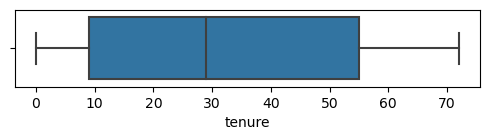

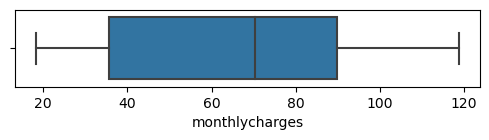

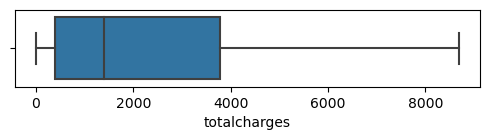

In [19]:
# check for outliers in numeric columns
plt.figure(figsize=(6, 1))
sns.boxplot(data=df, x="tenure")
plt.figure(figsize=(6, 1))
sns.boxplot(data=df, x="monthlycharges")
plt.figure(figsize=(6, 1))
sns.boxplot(data=df, x="totalcharges")
plt.show()

# [2] Knowing Our Customers

In [23]:
# function for displaying percent and absolute numbers together
def format_label(pct,count):
    absolute=int(pct/100.*count)
    return '{:.0f}%\n({:d})'.format(pct,absolute)

In [24]:
# set plots style
plt.style.use("seaborn-pastel")

## [2.1] Churn Status

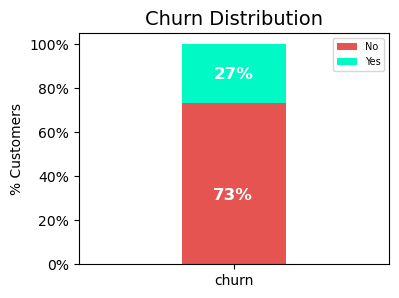

In [22]:
df3 = pd.melt(df, id_vars=['customerid'], value_vars=['churn'])
df4 = df3.groupby(['variable','value']).count().unstack()
df4 = df4*100/len(df)
colors = ['#E55451','#01F9C6']
ax = df4.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(4,3),rot = 0,
                                     width = 0.25)

ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_ylabel('% Customers',size = 10)
ax.set_xlabel('')
ax.set_title('Churn Distribution',size = 14)
ax.legend(loc = 'upper right',prop={'size':7})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 12)

## [2.2] Demographic Info

In [25]:
#gender
df.loc[df.gender == 'Male', 'gender'] = 0
df.loc[df.gender == 'Female', 'gender'] = 1

#partner
df.loc[df.partner == 'No', 'partner'] = 0
df.loc[df.partner == 'Yes', 'partner'] = 1

#dependents
df.loc[df.dependents == 'No', 'dependents'] = 0
df.loc[df.dependents == 'Yes', 'dependents'] = 1

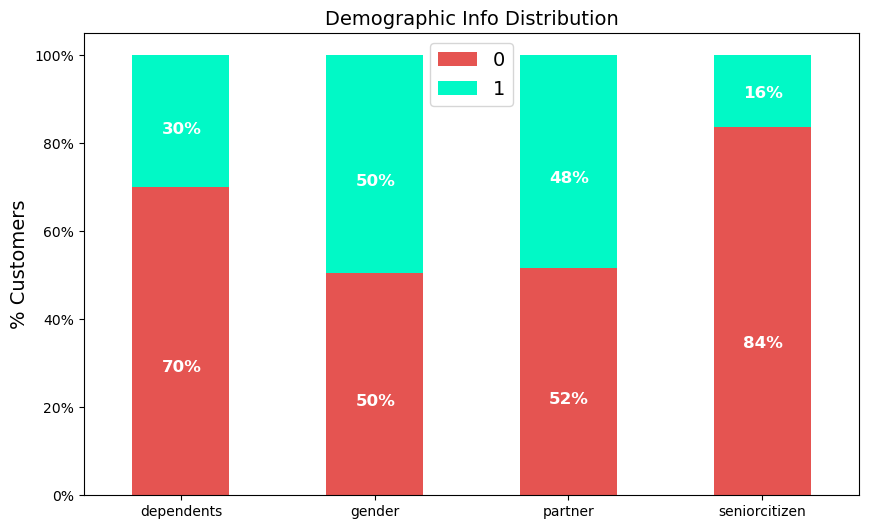

In [27]:
df3 = pd.melt(df, id_vars=['customerid'], value_vars=['gender','dependents','seniorcitizen','partner'])
df4 = df3.groupby(['variable','value']).count().unstack()
df4 = df4*100/len(df)
colors = ['#E55451','#01F9C6']
ax = df4.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(10,6),rot = 0,
                                     width = 0.5)

ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Demographic Info Distribution',size = 14)
ax.legend(loc = 'upper center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 12)

## [2.3] Core Services

In [28]:
# replace redundant values

#multiplelines
df.loc[df.multiplelines == 'No phone service', 'multiplelines'] = 'No'

#onlinesecurity
df.loc[df.onlinesecurity == 'No internet service', 'onlinesecurity'] = 'No'

#onlinebackup
df.loc[df.onlinebackup == 'No internet service', 'onlinebackup'] = 'No'

#deviceprotection
df.loc[df.deviceprotection == 'No internet service', 'deviceprotection'] = 'No'

#techsupport
df.loc[df.techsupport == 'No internet service', 'techsupport'] = 'No'

#streamingtv
df.loc[df.streamingtv == 'No internet service', 'streamingtv'] = 'No'

#streamingmovies
df.loc[df.streamingmovies == 'No internet service', 'streamingmovies'] = 'No'

### [2.3.1] Phone Service Distribution

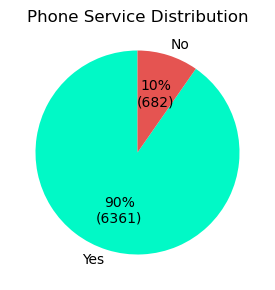

In [29]:
# Pie chart for phone service distribution
colors_set=['#01F9C6','#E55451']
plt.figure(figsize=(3, 3))
explode = (0.0, 0.0)
plt.pie(df['phoneservice'].value_counts(), autopct=lambda pct: format_label(pct,len(df)), colors=colors_set ,labels=df['phoneservice'].value_counts().index, startangle=90, explode=explode)
plt.title("Phone Service Distribution", pad=0)
plt.tight_layout()
plt.show()

### [2.3.2] Multiple Lines Distribution

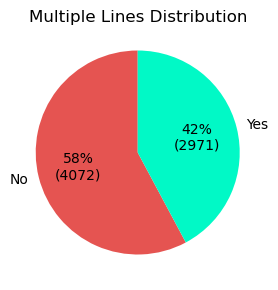

In [31]:
# Pie chart for multiple lines distribution
colors_set=['#E55451','#01F9C6']
plt.figure(figsize=(3, 3))
plt.pie(df['multiplelines'].value_counts(), autopct=lambda pct: format_label(pct,len(df)), colors=colors_set ,labels=df['multiplelines'].value_counts().index, startangle=90)
plt.title("Multiple Lines Distribution", pad=0)
plt.tight_layout()
plt.show()

### [2.3.3] Internet Service Distribution

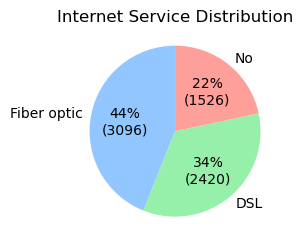

In [32]:
# Pie chart for internet service distribution
#colors_set=['#E55451','#01F9C6']
plt.figure(figsize=(3, 3))
plt.pie(df['internetservice'].value_counts(), autopct=lambda pct: format_label(pct,len(df)), labels=df['internetservice'].value_counts().index, startangle=90)
plt.title("Internet Service Distribution", pad=0)
plt.tight_layout()
plt.show()

In [33]:
# new dataframe with phone customers only
dfphonecheck=df.loc[(df['phoneservice'] == 'Yes')]

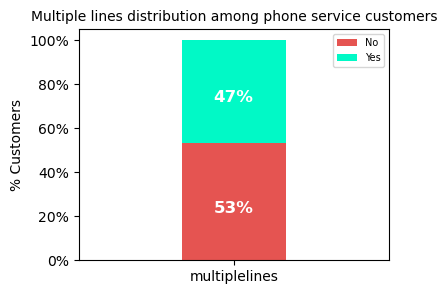

In [34]:
# check multiple lines distribution among phone service customers
df3 = pd.melt(dfphonecheck, id_vars=['customerid'], value_vars=['multiplelines'])
df4 = df3.groupby(['variable','value']).count().unstack()
df4 = df4*100/len(dfphonecheck)
colors = ['#E55451','#01F9C6']
ax = df4.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(4,3),rot = 0,
                                     width = 0.25)

ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_ylabel('% Customers',size = 10)
ax.set_xlabel('')
ax.set_title('Multiple lines distribution among phone service customers',size = 10)
ax.legend(loc = 'upper right',prop={'size':7})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 12)

### [2.3.4] Core Service Type (New Feature)

In [35]:
# Add Core Service Type column
df.loc[(df['phoneservice'] == 'Yes') & (df['internetservice'] == 'No'),'coreservicetype'] = 'Phone Service Only'
df.loc[(df['phoneservice'] == 'No') & (df['internetservice'] != 'No'),'coreservicetype'] = 'Internet Service Only'
df.loc[(df['phoneservice'] == 'Yes') & (df['internetservice'] != 'No'),'coreservicetype'] = 'Phone & Internet Services'

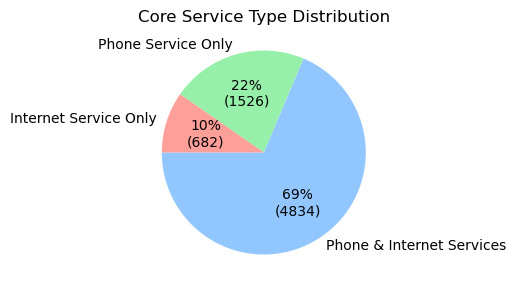

In [37]:
plt.figure(figsize=(5, 3))
plt.pie(df['coreservicetype'].value_counts(), autopct=lambda pct: format_label(pct,len(df)), labels=df['coreservicetype'].value_counts().index, startangle=180)
plt.title("Core Service Type Distribution", pad=0)
plt.tight_layout()
plt.show()

## [2.4] Extra Services

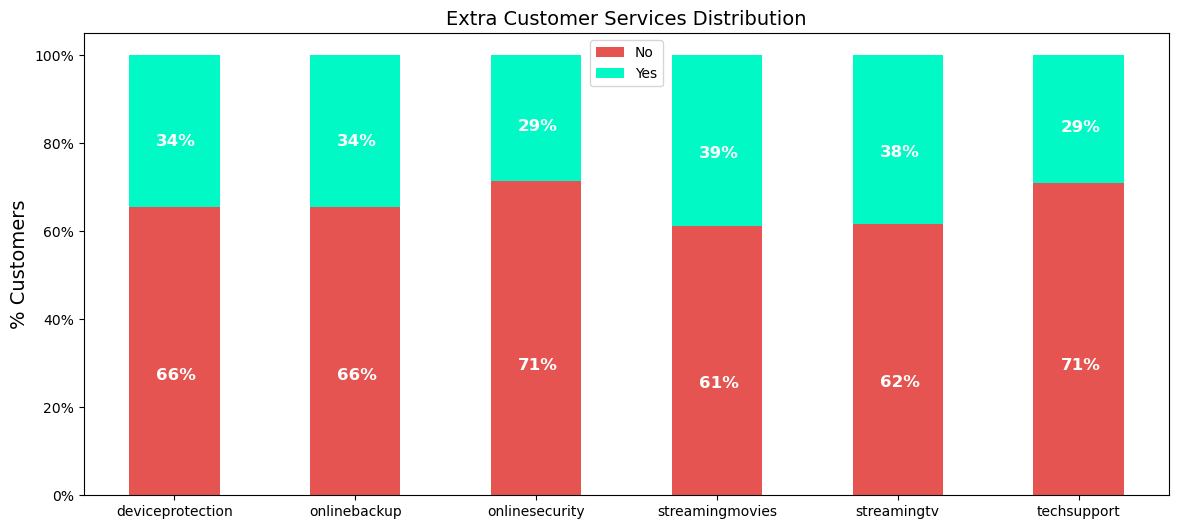

In [38]:
df3 = pd.melt(df, id_vars=['customerid'], value_vars=['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies'])
df4 = df3.groupby(['variable','value']).count().unstack()
df4 = df4*100/len(df)
colors = ['#E55451','#01F9C6']
ax = df4.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(14,6),rot = 0,
                                     width = 0.5)

ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Extra Customer Services Distribution',size = 14)
ax.legend(loc = 'upper center',prop={'size':10})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 12)

## [2.5] Customer Account

### [2.5.1] Contract Distribution

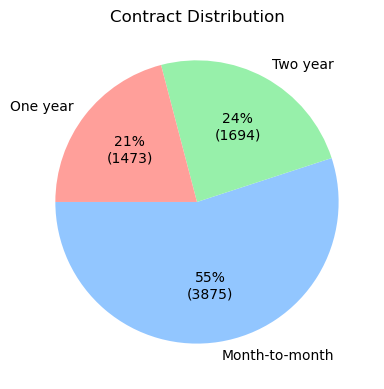

In [39]:
# Pie chart for Contract distribution
plt.figure(figsize=(4, 4))
plt.pie(df['contract'].value_counts(), autopct=lambda pct: format_label(pct,len(df)),labels=df['contract'].value_counts().index, startangle=180)
plt.title("Contract Distribution", pad=0)
plt.tight_layout()
plt.show()

### [2.5.2] Paperless Billing Distribution

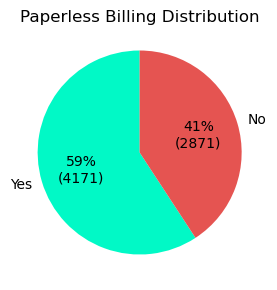

In [40]:
# Pie chart for Paperless Billing distribution
plt.figure(figsize=(3, 3))
colors_set=['#01F9C6','#E55451']
plt.pie(df['paperlessbilling'].value_counts(), autopct=lambda pct: format_label(pct,len(df)), colors=colors_set,labels=df['paperlessbilling'].value_counts().index, startangle=90)
plt.title("Paperless Billing Distribution", pad=0)
plt.tight_layout()
plt.show()

### [2.5.3] Payment Method Distribution

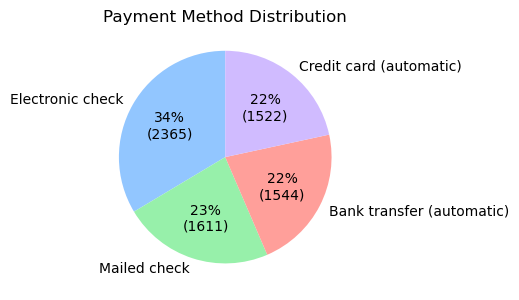

In [41]:
# Pie chart for Payment Method distribution
plt.figure(figsize=(5, 5))
plt.pie(df['paymentmethod'].value_counts(), autopct=lambda pct: format_label(pct,len(df)),labels=df['paymentmethod'].value_counts().index, startangle=90)
plt.title("Payment Method Distribution", pad=0)
plt.tight_layout()
plt.show()

#### [2.5.3.1] Payment Method Type (New Feature)

In [42]:
# Add payment method type column

df.loc[(df['paymentmethod'] == 'Credit card (automatic)'),'paymentmethodtype'] = 'Automatic'
df.loc[(df['paymentmethod'] == 'Bank transfer (automatic)'),'paymentmethodtype'] = 'Automatic'
df.loc[(df['paymentmethod'] == 'Mailed check'),'paymentmethodtype'] = 'Manual'
df.loc[(df['paymentmethod'] == 'Electronic check'),'paymentmethodtype'] = 'Manual'


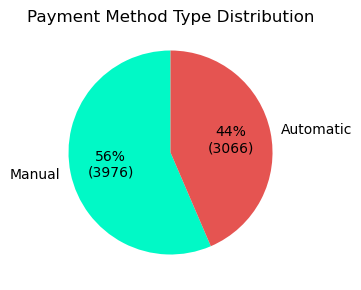

In [43]:
# Pie chart for payment method type distribution
plt.figure(figsize=(5, 3))
colors_set=['#01F9C6','#E55451']
plt.pie(df['paymentmethodtype'].value_counts(), autopct=lambda pct: format_label(pct,len(df)), colors=colors_set,labels=df['paymentmethodtype'].value_counts().index, startangle=90)
plt.title("Payment Method Type Distribution", pad=0)
plt.tight_layout()
plt.show()

### [2.5.4] Tenure Distribution

Text(0.5, 1.0, 'Tenure Distribution')

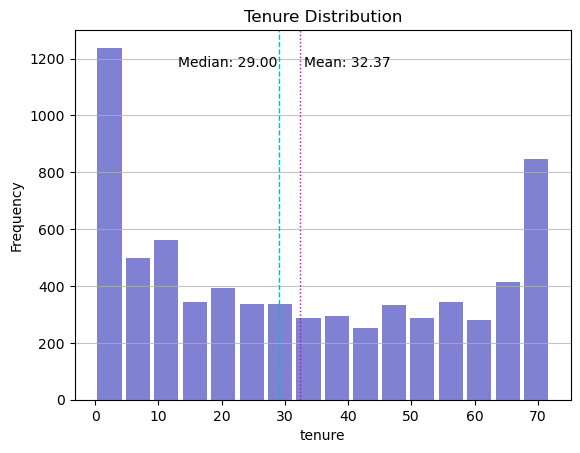

In [44]:
# Histogram for tenure distribution
plt.hist(x=df['tenure'], bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.axvline(df['tenure'].mean(), color='m', linestyle='dotted', linewidth=1)
plt.axvline(df['tenure'].median(), color='c', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df['tenure'].mean()*1.02, max_ylim*0.9, 'Mean: {:.2f}'.format(df['tenure'].mean()))
plt.text(df['tenure'].median()*0.45, max_ylim*0.9, 'Median: {:.2f}'.format(df['tenure'].median()))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

#### [2.5.4.1] Tenure Group Distribution

In [45]:
# Add tenure group column

df.loc[(df['tenure'] <=12),'tenuregroup'] = '0-12' #1st year

df.loc[(df['tenure'] >=13.) & (df['tenure'] <25.),'tenuregroup'] = '13-24' #2nd year

df.loc[(df['tenure'] >=25.) & (df['tenure'] <37.),'tenuregroup'] = '25-36' #3rd year

df.loc[(df['tenure'] >=37.) & (df['tenure'] <49.),'tenuregroup'] = '37-48' #4th year

df.loc[(df['tenure'] >=49.) & (df['tenure'] <61.),'tenuregroup'] = '49-60' #5th year

df.loc[(df['tenure'] >= 61.),'tenuregroup'] = '61+' #6th year and above

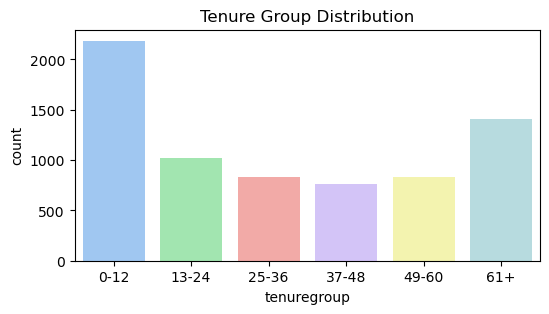

In [46]:
plt.figure(figsize=(6,3))
sns.countplot(x='tenuregroup',data=df,order=['0-12','13-24','25-36','37-48','49-60','61+']).set_title('Tenure Group Distribution')
plt.show()

### [2.5.5] Monthly Charges Distribution

Text(0.5, 1.0, 'Monthly Charges Distribution')

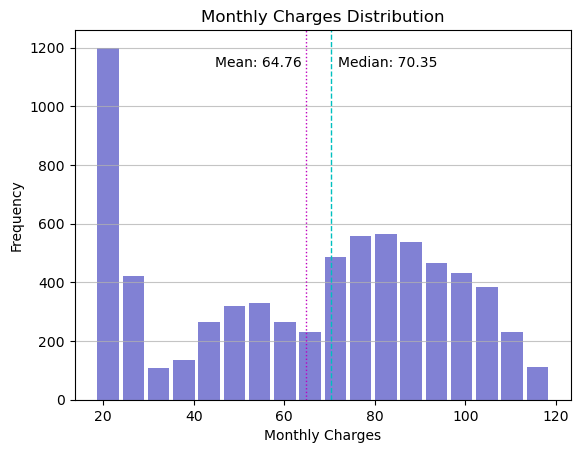

In [47]:
# Histogram for monthly charges distribution
plt.hist(x=df['monthlycharges'], bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.axvline(df['monthlycharges'].mean(), color='m', linestyle='dotted', linewidth=1)
plt.axvline(df['monthlycharges'].median(), color='c', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df['monthlycharges'].mean()*0.69, max_ylim*0.9, 'Mean: {:.2f}'.format(df['monthlycharges'].mean()))
plt.text(df['monthlycharges'].median()*1.02, max_ylim*0.9, 'Median: {:.2f}'.format(df['monthlycharges'].median()))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')

#### [2.5.5.1] Monthly Charges Group Distribution

In [48]:
# Add monthlychargesgroup column

df.loc[(df['monthlycharges'] <21.),'monthlychargesgroup'] = '0-20'

df.loc[(df['monthlycharges'] >=21.) & (df['monthlycharges'] <41.),'monthlychargesgroup'] = '21-40'

df.loc[(df['monthlycharges'] >=41.) & (df['monthlycharges'] <61.),'monthlychargesgroup'] = '41-60'

df.loc[(df['monthlycharges'] >=61.) & (df['monthlycharges'] <81.),'monthlychargesgroup'] = '61-80'

df.loc[(df['monthlycharges'] >=81.) & (df['monthlycharges'] <101.),'monthlychargesgroup'] = '81-100'

df.loc[(df['monthlycharges'] >= 101.),'monthlychargesgroup'] = '101+'

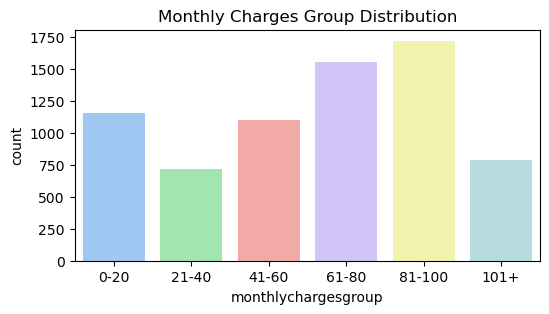

In [49]:
plt.figure(figsize=(6,3))
sns.countplot(x='monthlychargesgroup',data=df,order=['0-20','21-40','41-60','61-80','81-100','101+']).set_title('Monthly Charges Group Distribution')
plt.show()

### [2.5.6] Total Charges Distribution

Text(0.5, 1.0, 'Total Charges Distribution')

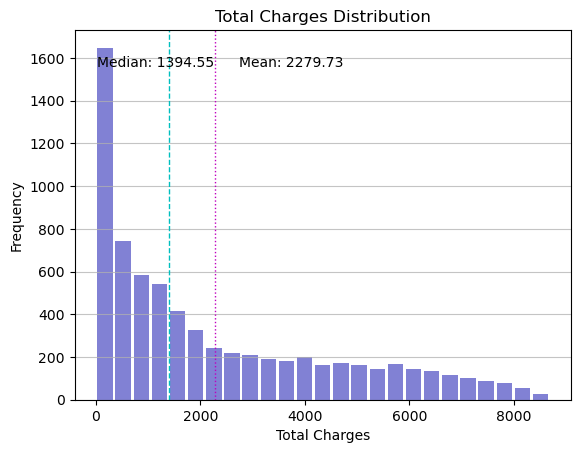

In [50]:
# Histogram for total charges distribution
plt.hist(x=df['totalcharges'], bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.axvline(df['totalcharges'].mean(), color='m', linestyle='dotted', linewidth=1)
plt.axvline(df['totalcharges'].median(), color='c', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df['totalcharges'].mean()*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(df['totalcharges'].mean()))
plt.text(df['totalcharges'].median()*0.009, max_ylim*0.9, 'Median: {:.2f}'.format(df['totalcharges'].median()))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')

#### [2.5.6.1] Total Charges Group Distribution

In [51]:
# Add totalchargesgroup column

df.loc[(df['totalcharges'] <1001.),'totalchargesgroup'] = '0-1000'

df.loc[(df['totalcharges'] >=1001.) & (df['totalcharges'] <2001.),'totalchargesgroup'] = '1001-2000'

df.loc[(df['totalcharges'] >=2001.) & (df['totalcharges'] <3001.),'totalchargesgroup'] = '2001-3000'

df.loc[(df['totalcharges'] >=3001.) & (df['totalcharges'] <4001.),'totalchargesgroup'] = '3001-4000'

df.loc[(df['totalcharges'] >=4001.) & (df['totalcharges'] <5001.),'totalchargesgroup'] = '4001-5000'

df.loc[(df['totalcharges'] >=5001.) & (df['totalcharges'] <6001.),'totalchargesgroup'] = '5001-6000'

df.loc[(df['totalcharges'] >=6001.) & (df['totalcharges'] <7001.),'totalchargesgroup'] = '6001-7000'

df.loc[(df['totalcharges'] >=7001.),'totalchargesgroup'] = '7001+'

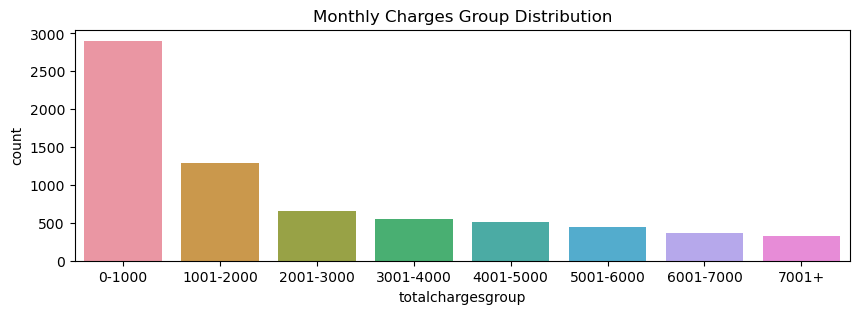

In [52]:
plt.figure(figsize=(10,3))
sns.countplot(x='totalchargesgroup',data=df,order=['0-1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001+']).set_title('Monthly Charges Group Distribution')
plt.show()

# [3] Correlations With Churn

## [3.1] Demographic Info

In [55]:
#gender
df.loc[df.gender == 0, 'gender'] = 'Male'
df.loc[df.gender == 1, 'gender'] = 'Female'

#partner
df.loc[df.partner == 0, 'partner'] = 'No'
df.loc[df.partner == 1, 'partner'] = 'Yes'

#dependents
df.loc[df.dependents == 0, 'dependents'] = 'No'
df.loc[df.dependents == 1, 'dependents'] = 'Yes'

#seniorcitizen
df.loc[df.seniorcitizen == 0, 'seniorcitizen'] = 'No'
df.loc[df.seniorcitizen == 1, 'seniorcitizen'] = 'Yes'

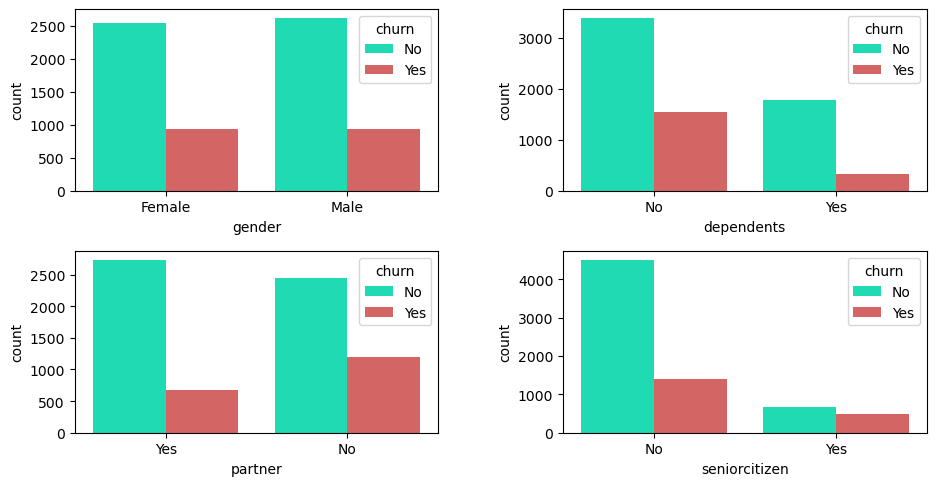

In [56]:
fig,ax=plt.subplots(2,2)
colors_set=['#01F9C6','#E55451']
sns.countplot(x=df['gender'], ax=ax[0][0], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['dependents'], ax=ax[0][1], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['partner'], ax=ax[1][0], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['seniorcitizen'], ax=ax[1][1], hue=df['churn'], palette=colors_set)
fig.tight_layout()
plt.gcf().set_size_inches(10, 5)

## [3.2] Core Services

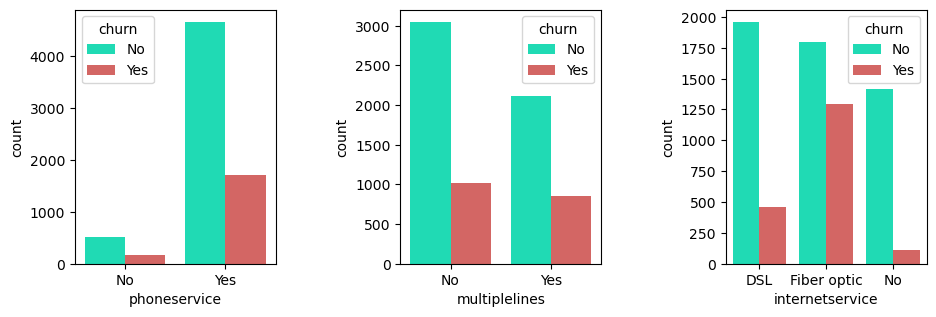

In [57]:
fig,ax=plt.subplots(1,3)
colors_set=['#01F9C6','#E55451']
sns.countplot(x=df['phoneservice'], ax=ax[0], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['multiplelines'], ax=ax[1], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['internetservice'], ax=ax[2], hue=df['churn'], palette=colors_set)
fig.tight_layout()
plt.gcf().set_size_inches(10, 3)

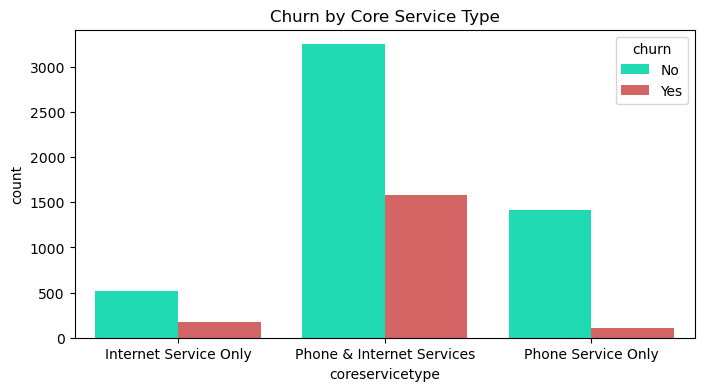

In [58]:
plt.figure(figsize=(8,4))
colors_set=['#01F9C6','#E55451']
ax=sns.countplot(x='coreservicetype',hue='churn',data=df,palette=colors_set).set_title('Churn by Core Service Type')
plt.show()

## [3.3] Extra Services

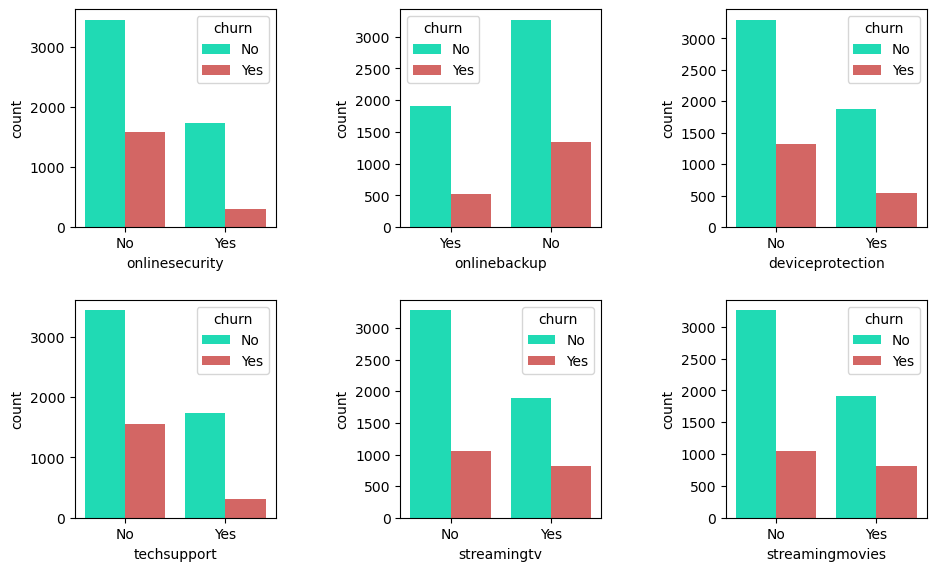

In [59]:
fig,ax=plt.subplots(2,3)
colors_set=['#01F9C6','#E55451']
sns.countplot(x=df['onlinesecurity'], ax=ax[0][0], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['onlinebackup'], ax=ax[0][1], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['deviceprotection'], ax=ax[0][2], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['techsupport'], ax=ax[1][0], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['streamingtv'], ax=ax[1][1], hue=df['churn'], palette=colors_set)
sns.countplot(x=df['streamingmovies'], ax=ax[1][2], hue=df['churn'], palette=colors_set)
fig.tight_layout()
plt.gcf().set_size_inches(10, 6)

## [3.4] Customer Account

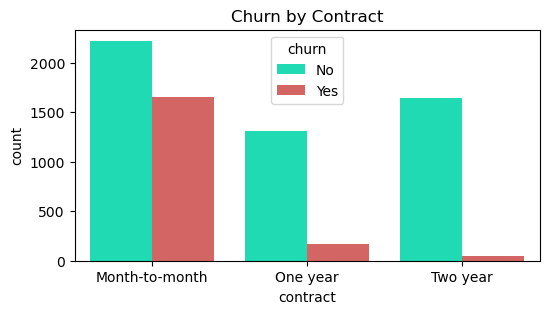

In [60]:
plt.figure(figsize=(6,3))
colors_set=['#01F9C6','#E55451']
sns.countplot(x='contract',hue='churn',data=df,palette=colors_set).set_title('Churn by Contract')
plt.show()

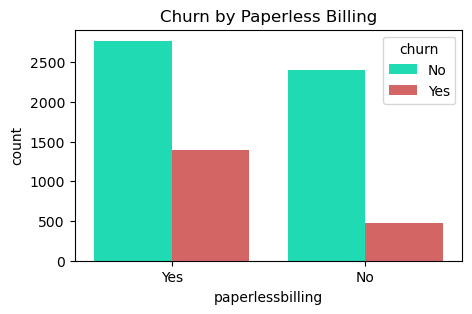

In [61]:
plt.figure(figsize=(5,3))
colors_set=['#01F9C6','#E55451']
sns.countplot(x='paperlessbilling',hue='churn',data=df,palette=colors_set).set_title('Churn by Paperless Billing')
plt.show()

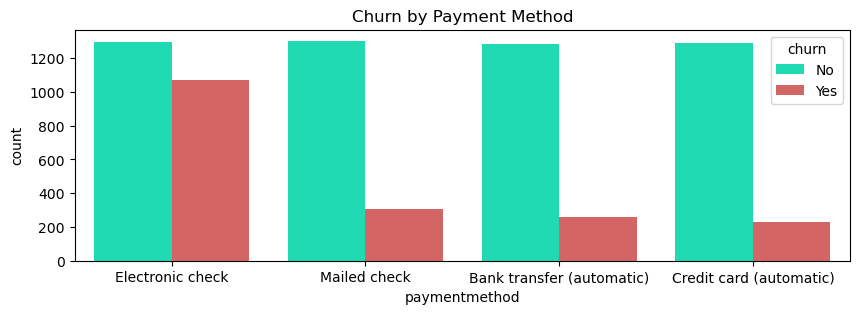

In [62]:
plt.figure(figsize=(10,3))
colors_set=['#01F9C6','#E55451']
sns.countplot(x='paymentmethod',hue='churn',data=df,palette=colors_set).set_title('Churn by Payment Method')
plt.show()

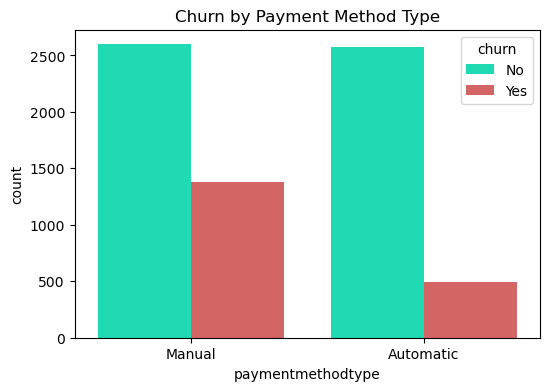

In [63]:
plt.figure(figsize=(6,4))
colors_set=['#01F9C6','#E55451']
ax=sns.countplot(x='paymentmethodtype',hue='churn',data=df,palette=colors_set).set_title('Churn by Payment Method Type')
plt.show()

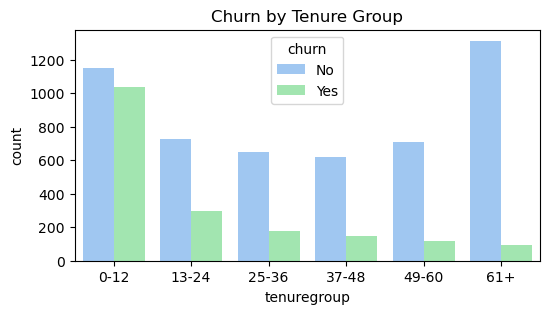

In [64]:
plt.figure(figsize=(6,3))
sns.countplot(x='tenuregroup',hue='churn',data=df,order=['0-12','13-24','25-36','37-48','49-60','61+']).set_title('Churn by Tenure Group')
plt.show()

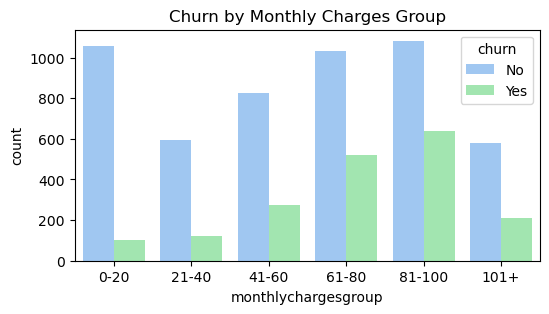

In [65]:
plt.figure(figsize=(6,3))
sns.countplot(x='monthlychargesgroup',hue='churn',data=df,order=['0-20','21-40','41-60','61-80','81-100','101+']).set_title('Churn by Monthly Charges Group')
plt.show()

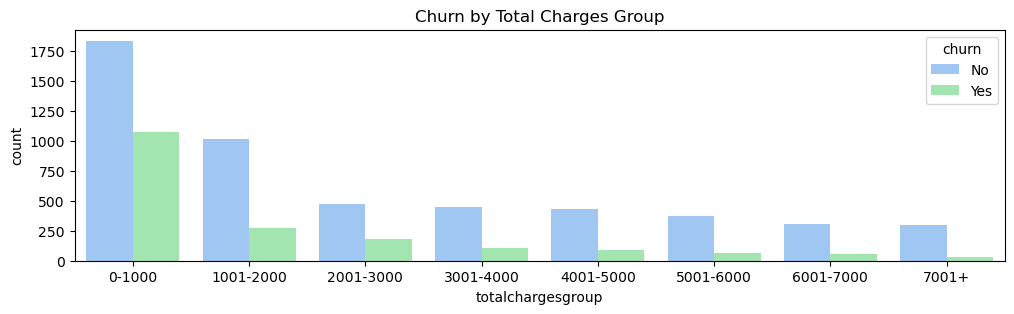

In [66]:
# high tenure predicts less churn, totaL Charges derived from tenure, so it makes sense less churn is shown for high total charges groups
plt.figure(figsize=(12,3))
sns.countplot(x='totalchargesgroup',hue='churn',data=df,order=['0-1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001+']).set_title('Churn by Total Charges Group')
plt.show()

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

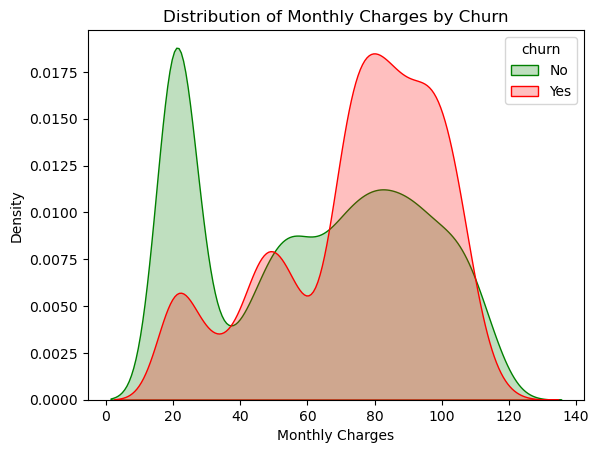

In [67]:
# kde plot [1] - monthly charges
ax = sns.kdeplot(df.monthlycharges[(df["churn"] == 'No')],
                color="Green", shade = True)
ax = sns.kdeplot(df.monthlycharges[(df["churn"] == 'Yes')],
                ax =ax, color="Red", shade= True)
ax.legend(["No","Yes"],loc='upper right',title='churn')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

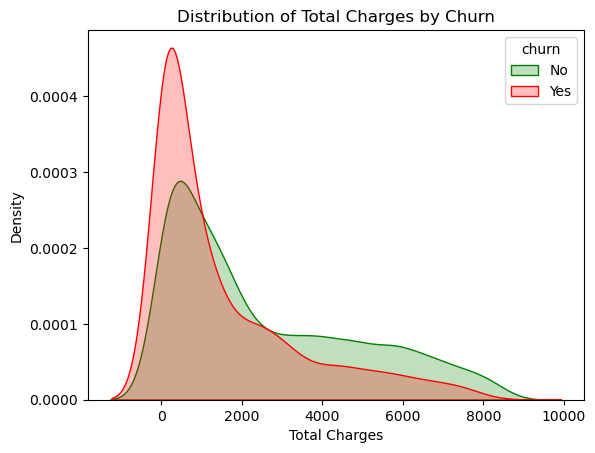

In [68]:
# kde plot [2] - total charges
ax = sns.kdeplot(df.totalcharges[(df["churn"] == 'No')],
                color="Green", shade = True)
ax = sns.kdeplot(df.totalcharges[(df["churn"] == 'Yes')],
                ax =ax, color="Red", shade= True)
ax.legend(["No","Yes"],loc='upper right',title='churn')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

Text(0.5, 1.0, 'Distribution of Tenure by Churn')

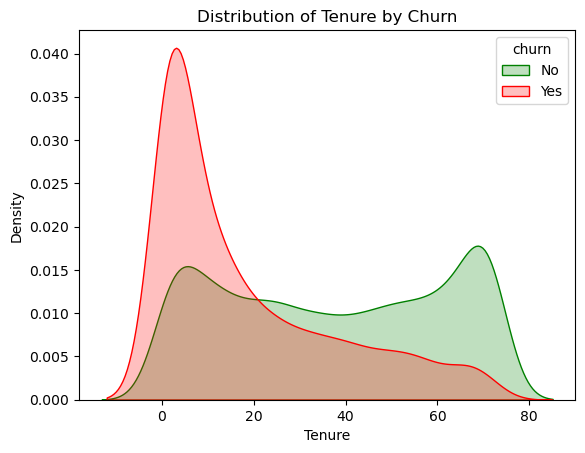

In [69]:
# kde plot [3] - tenure
ax = sns.kdeplot(df.tenure[(df["churn"] == 'No')],
                color="Green", shade = True)
ax = sns.kdeplot(df.tenure[(df["churn"] == 'Yes')],
                ax =ax, color="Red", shade= True)
ax.legend(["No","Yes"],loc='upper right',title='churn')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

# [5] Num of Extra Services and HasAdditionalServices (New Features)

In [70]:
# Add a column that counts the total number of susbscribed extra services
df['numofextraservices']=(df[['deviceprotection','onlinebackup','onlinesecurity','streamingmovies','streamingtv','techsupport']]=="Yes").sum(axis=1)

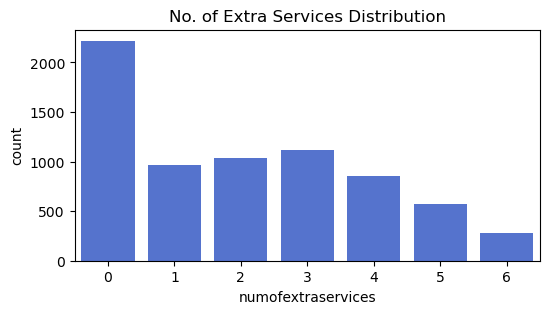

In [71]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='numofextraservices',palette=['#4169E1']).set_title('No. of Extra Services Distribution')
plt.show()

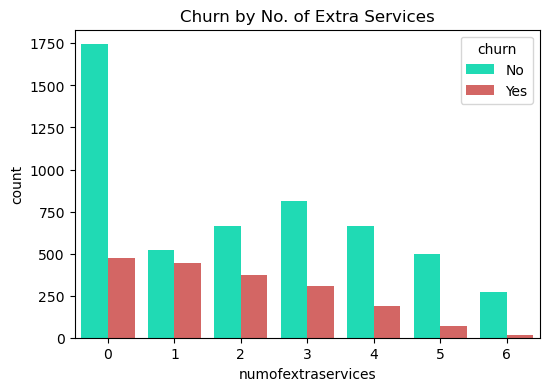

In [72]:
plt.figure(figsize=(6,4))
colors_set=['#01F9C6','#E55451']
ax=sns.countplot(x='numofextraservices',hue='churn',data=df,palette=colors_set).set_title('Churn by No. of Extra Services')
plt.show()

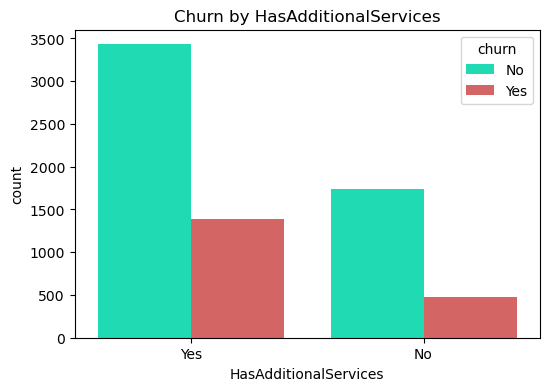

In [73]:
df['HasAdditionalServices']='Yes'
df.loc[(df['numofextraservices'] ==0),'HasAdditionalServices'] ='No'

plt.figure(figsize=(6,4))
colors_set=['#01F9C6','#E55451']
ax=sns.countplot(x='HasAdditionalServices',hue='churn',data=df,palette=colors_set).set_title('Churn by HasAdditionalServices')
plt.show()

# [6] Data Transformation

In [74]:
# Drop multiple columns by Name (the model requires numeric raw data instead of groups)
df.drop(['customerid','tenuregroup','monthlychargesgroup','totalchargesgroup'], axis = 1, inplace=True)

In [75]:
df.loc[df.churn == 'No', 'churn'] = 0
df.loc[df.churn == 'Yes', 'churn'] = 1
df = df.astype({"churn": 'int64'})

In [76]:
cleandf = pd.get_dummies(df, columns=['internetservice','contract','paymentmethod','coreservicetype','paymentmethodtype'])

In [77]:
cleandf

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,coreservicetype_Internet Service Only,coreservicetype_Phone & Internet Services,coreservicetype_Phone Service Only,paymentmethodtype_Automatic,paymentmethodtype_Manual
0,Female,No,Yes,No,1,No,No,No,Yes,No,...,0,0,0,1,0,1,0,0,0,1
1,Male,No,No,No,34,Yes,No,Yes,No,Yes,...,0,0,0,0,1,0,1,0,0,1
2,Male,No,No,No,2,Yes,No,Yes,Yes,No,...,0,0,0,0,1,0,1,0,0,1
3,Male,No,No,No,45,No,No,Yes,No,Yes,...,0,1,0,0,0,1,0,0,1,0
4,Female,No,No,No,2,Yes,No,No,No,No,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,0,0,0,0,1,0,1,0,0,1
7039,Female,No,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,0,0,1,0,0,0,1,0,1,0
7040,Female,No,Yes,Yes,11,No,No,Yes,No,No,...,0,0,0,1,0,1,0,0,0,1
7041,Male,Yes,Yes,No,4,Yes,Yes,No,No,No,...,0,0,0,0,1,0,1,0,0,1


In [78]:
cleandf.dtypes

gender                                        object
seniorcitizen                                 object
partner                                       object
dependents                                    object
tenure                                         int64
phoneservice                                  object
multiplelines                                 object
onlinesecurity                                object
onlinebackup                                  object
deviceprotection                              object
techsupport                                   object
streamingtv                                   object
streamingmovies                               object
paperlessbilling                              object
monthlycharges                               float64
totalcharges                                 float64
churn                                          int64
numofextraservices                             int64
HasAdditionalServices                         

# [7] Total Subscribed Services Count (New Feature)

In [79]:
cleandf.loc[cleandf.multiplelines == 'No', 'multiplelines'] = 0
cleandf.loc[cleandf.multiplelines == 'Yes', 'multiplelines'] = 1
cleandf = cleandf.astype({"multiplelines": 'int64'})

In [80]:
# Add a column that counts the total number of total susbscribed services
cleandf['totalservicescount'] = cleandf['numofextraservices']+cleandf['coreservicetype_Internet Service Only']+cleandf['coreservicetype_Phone Service Only']+cleandf['coreservicetype_Phone & Internet Services']+cleandf['multiplelines']
cleandf.loc[(cleandf['coreservicetype_Phone & Internet Services']==1),'totalservicescount'] = cleandf['totalservicescount']+1

In [81]:
cleandf.loc[cleandf.multiplelines == 0, 'multiplelines'] = 'No'
cleandf.loc[cleandf.multiplelines == 1, 'multiplelines'] = 'Yes'

Text(0.5, 1.0, 'Churn by No. of Total Services')

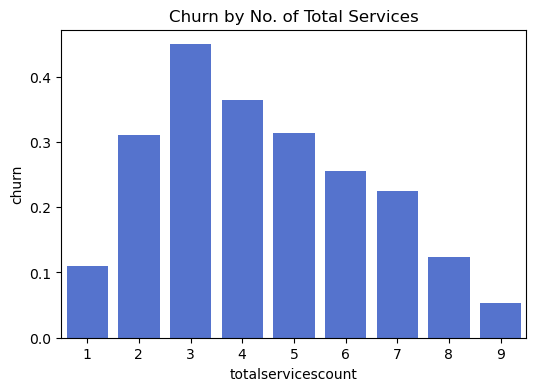

In [82]:
plt.figure(figsize=(6, 4))
sns.barplot(data=cleandf, x="totalservicescount", y="churn", ci = None, palette=['#4169E1'])
plt.title("Churn by No. of Total Services")

# [8] Payment Group (New Feature)

In [83]:
# how much do customer pay for total services?
byServiceAmnt=cleandf.groupby('totalservicescount')
byServiceAmnt['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
totalservicescount,,,,,,,,
1,1264.0,20.268354,1.305638,18.25,19.6000,20.000,20.4000,26.05
2,859.0,42.000873,18.640315,22.95,25.2000,34.200,69.0750,72.25
3,846.0,61.700059,15.774029,33.15,49.5500,72.925,75.4000,81.95
4,965.0,69.356010,16.279176,37.70,54.7500,79.050,84.5000,92.90
5,922.0,78.726681,15.775653,43.25,63.6250,86.775,91.4875,97.65
6,908.0,86.306553,15.079771,52.50,70.6375,94.400,99.3500,104.05
7,676.0,93.642382,13.993060,62.50,79.3375,102.600,105.0000,108.80
8,395.0,99.427215,12.757169,78.35,84.9500,108.100,109.9500,114.10
9,208.0,104.632212,12.453711,85.75,90.4375,113.325,115.3125,118.75


In [84]:
# Create a new feature called "paymentgroup"
# We will use the data on the desctiptive table to divide the monthly charges:
# Those who paid more than the 75% were considered 'Overpaid', 
# If paid less than the 25% where categorized as 'Underpaid', else 'Normal' fare
cleandf['paymentgroup'] = 'Normal'

cleandf.loc[(cleandf['monthlycharges']<19.6000) & (cleandf['totalservicescount']==1),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>20.4000) & (cleandf['totalservicescount']==1),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<25.2000) & (cleandf['totalservicescount']==2),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>69.0750) & (cleandf['totalservicescount']==2),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<49.55000) & (cleandf['totalservicescount']==3),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>75.4000) & (cleandf['totalservicescount']==3),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<54.7500) & (cleandf['totalservicescount']==4),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>84.5000) & (cleandf['totalservicescount']==4),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<63.6250) & (cleandf['totalservicescount']==5),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>91.4875) & (cleandf['totalservicescount']==5),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<70.6375) & (cleandf['totalservicescount']==6),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>99.3500) & (cleandf['totalservicescount']==6),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<79.3375) & (cleandf['totalservicescount']==7),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>105.0000) & (cleandf['totalservicescount']==7),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<84.9500) & (cleandf['totalservicescount']==8),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>109.9500) & (cleandf['totalservicescount']==8),'paymentgroup'] = 'Overpaid'

cleandf.loc[(cleandf['monthlycharges']<90.4375) & (cleandf['totalservicescount']==9),'paymentgroup'] = 'Underpaid'
cleandf.loc[(cleandf['monthlycharges']>115.3125) & (cleandf['totalservicescount']==9),'paymentgroup'] = 'Overpaid'

In [85]:
cleandf.groupby(['totalservicescount','paymentgroup']).agg({'churn':['count',sum,'mean']})

churn               
                                count  sum      mean
totalservicescount paymentgroup                     
1                  Normal         684   63  0.092105
                   Overpaid       300   51  0.170000
                   Underpaid      280   24  0.085714
2                  Normal         434  131  0.301843
                   Overpaid       215  128  0.595349
                   Underpaid      210    7  0.033333
3                  Normal         426  187  0.438967
                   Overpaid       209  134  0.641148
                   Underpaid      211   59  0.279621
4                  Normal         489  163  0.333333
                   Overpaid       239  146  0.610879
                   Underpaid      237   43  0.181435
5                  Normal         460  131  0.284783
                   Overpaid       231  129  0.558442
                   Underpaid      231   29  0.125541
6                  Normal         455  113  0.248352
                   Overpaid       226  103  0.455752
                   Underpaid      227   16  0.070485
7                  Normal         342   89  0.260234
                   Overpaid       165   56  0.339394
                   Underpaid      169    7  0.041420
8                  Normal         199   24  0.120603
                   Overpaid        98   20  0.204082
                   Underpaid       98    5  0.051020
9                  Normal         104    5  0.048077
                   Overpaid        52    6  0.115385
                   Underpaid       52    0  0.000000

Text(0.5, 1.0, 'Churn by No. of Total Services & Payment Group')

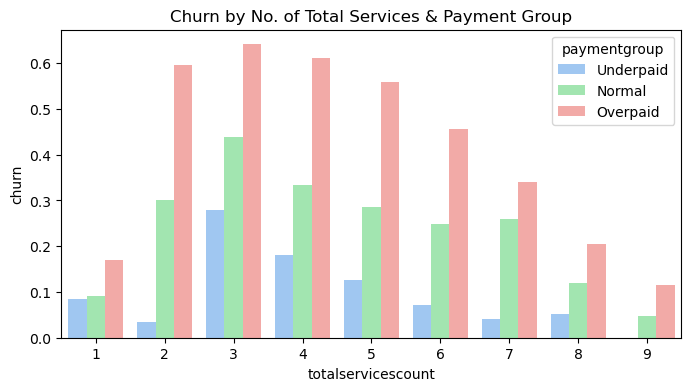

In [86]:
plt.figure(figsize=(8, 4))
sns.barplot(data=cleandf, x="totalservicescount", y="churn", hue="paymentgroup", hue_order= ['Underpaid','Normal','Overpaid'], ci = None)
plt.title("Churn by No. of Total Services & Payment Group")

Text(0.5, 1.0, 'Churn by Payment Group')

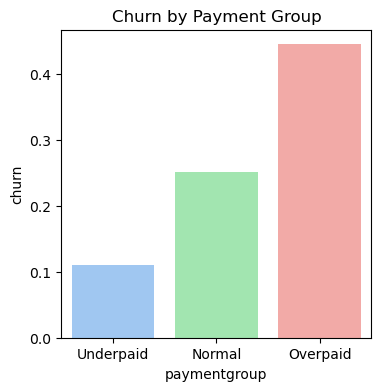

In [87]:
plt.figure(figsize=(4, 4))
sns.barplot(data=cleandf, x="paymentgroup", y="churn", ci = None, order=['Underpaid','Normal','Overpaid'])
plt.title("Churn by Payment Group")

In [88]:
cleandf=pd.get_dummies(cleandf)

# [9] Correlations Bar Chart 

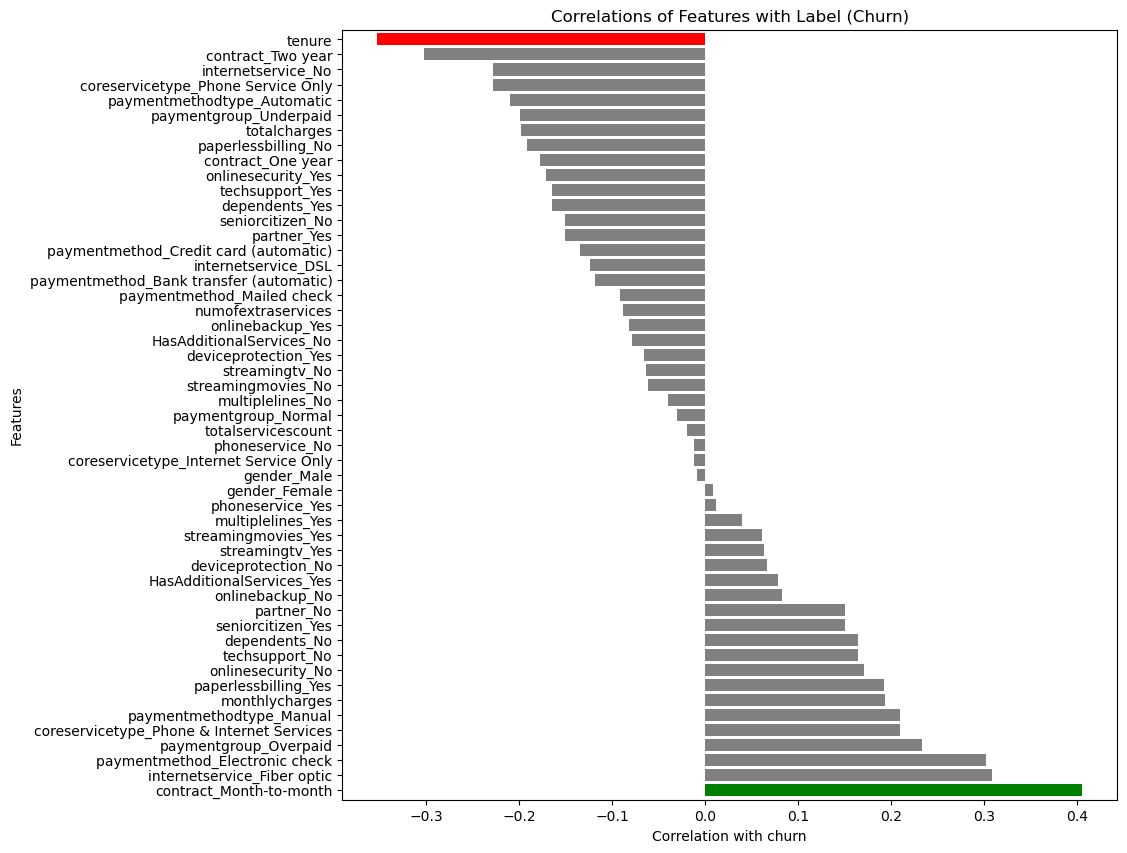

In [89]:
fig, ax = plt.subplots(figsize=(10,10))
corr_df = cleandf.corr()['churn'].drop('churn').sort_values(ascending=False)
colors = ['green' if i == 0 else 'gray' if i != len(corr_df)-1 else 'red' for i in range(len(corr_df))]
corr_df.plot(kind='barh', ax=ax, color=colors, width=0.8)
ax.set_title('Correlations of Features with Label (Churn)')
ax.set_xlabel('Correlation with churn')
ax.set_ylabel('Features')
plt.show()

In [90]:
#The variable Contract_Month-to-month has the strongest correlation with churn
cleandf['contract_Month-to-month']

0       1
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    1
7041    1
7042    0
Name: contract_Month-to-month, Length: 7043, dtype: uint8

In [91]:
#What is the feature distribution?
CMM_distribution = cleandf['contract_Month-to-month'].value_counts(normalize=True).sort_index()
CMM_distribution

0    0.449808
1    0.550192
Name: contract_Month-to-month, dtype: float64

In [92]:
#What are the Churn rates for each feature value?
churn_by_CMM_rates = cleandf.groupby('contract_Month-to-month').churn.mean()
churn_by_CMM_rates

contract_Month-to-month
0    0.067551
1    0.427097
Name: churn, dtype: float64

In [93]:
CMM_stats = pd.DataFrame({'contract_Month-to-month_dist':CMM_distribution, 'Churn_rate':churn_by_CMM_rates})
CMM_stats

,contract_Month-to-month_dist,Churn_rate
0,0.449808,0.067551
1,0.550192,0.427097


In [94]:
CMM_stats.index = CMM_stats.index.map({0:'No', 1:'Yes'})
CMM_stats

,contract_Month-to-month_dist,Churn_rate
No,0.449808,0.067551
Yes,0.550192,0.427097


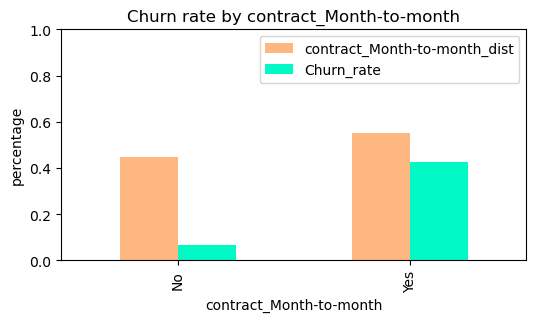

In [95]:
colors = ['#FFB782','#01F9C6']
CMM_stats.plot(kind='bar', color = colors)
plt.xlabel('contract_Month-to-month')
plt.ylabel('percentage')
plt.ylim(0, 1)
plt.title('Churn rate by contract_Month-to-month')
plt.gcf().set_size_inches(6, 3)

# [10] Machine Learning

In [96]:
# Let's convert all data to float because some modules warn against other types
cleandf = cleandf.astype(float)

In [97]:
#checking missing values
cleandf.isna().sum()

tenure                                       0
monthlycharges                               0
totalcharges                                 0
churn                                        0
numofextraservices                           0
internetservice_DSL                          0
internetservice_Fiber optic                  0
internetservice_No                           0
contract_Month-to-month                      0
contract_One year                            0
contract_Two year                            0
paymentmethod_Bank transfer (automatic)      0
paymentmethod_Credit card (automatic)        0
paymentmethod_Electronic check               0
paymentmethod_Mailed check                   0
coreservicetype_Internet Service Only        0
coreservicetype_Phone & Internet Services    0
coreservicetype_Phone Service Only           0
paymentmethodtype_Automatic                  0
paymentmethodtype_Manual                     0
totalservicescount                           0
gender_Female

## [10.1] Train-Test Data Split

In [98]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(cleandf, test_size=1409, random_state=0, shuffle=True)

label = 'churn'

x_train = train.drop(label, axis=1)
y_train = train[label]

x_test = test.drop(label, axis=1)
y_test = test[label]

In [99]:
train

,tenure,monthlycharges,totalcharges,churn,numofextraservices,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,HasAdditionalServices_No,HasAdditionalServices_Yes,paymentgroup_Normal,paymentgroup_Overpaid,paymentgroup_Underpaid
2920,72.0,85.10,6155.40,0.0,6.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2966,14.0,46.35,672.70,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6099,71.0,24.70,1810.55,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5482,33.0,73.90,2405.05,1.0,4.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2012,47.0,98.75,4533.70,1.0,4.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,15.0,103.45,1539.80,0.0,4.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3264,10.0,91.10,964.35,0.0,3.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1653,58.0,20.75,1185.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2607,1.0,69.75,69.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [100]:
test

,tenure,monthlycharges,totalcharges,churn,numofextraservices,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,HasAdditionalServices_No,HasAdditionalServices_Yes,paymentgroup_Normal,paymentgroup_Overpaid,paymentgroup_Underpaid
2200,19.0,58.20,1045.25,0.0,2.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4627,60.0,116.60,7049.50,0.0,6.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3225,13.0,71.95,923.85,0.0,3.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2828,1.0,20.45,20.45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3768,55.0,77.75,4266.40,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,7.0,99.25,665.45,1.0,3.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5333,13.0,88.35,1222.80,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6972,56.0,111.95,6418.90,1.0,5.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4598,18.0,56.25,969.85,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [101]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5634, 51), (5634,), (1409, 51), (1409,))

In [102]:
x_train

,tenure,monthlycharges,totalcharges,numofextraservices,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,HasAdditionalServices_No,HasAdditionalServices_Yes,paymentgroup_Normal,paymentgroup_Overpaid,paymentgroup_Underpaid
2920,72.0,85.10,6155.40,6.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2966,14.0,46.35,672.70,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6099,71.0,24.70,1810.55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5482,33.0,73.90,2405.05,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2012,47.0,98.75,4533.70,4.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,15.0,103.45,1539.80,4.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3264,10.0,91.10,964.35,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1653,58.0,20.75,1185.95,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2607,1.0,69.75,69.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [103]:
y_train

2920    0.0
2966    0.0
6099    0.0
5482    1.0
2012    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5634, dtype: float64

In [104]:
x_test

,tenure,monthlycharges,totalcharges,numofextraservices,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,paperlessbilling_No,paperlessbilling_Yes,HasAdditionalServices_No,HasAdditionalServices_Yes,paymentgroup_Normal,paymentgroup_Overpaid,paymentgroup_Underpaid
2200,19.0,58.20,1045.25,2.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4627,60.0,116.60,7049.50,6.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3225,13.0,71.95,923.85,3.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2828,1.0,20.45,20.45,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3768,55.0,77.75,4266.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,7.0,99.25,665.45,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5333,13.0,88.35,1222.80,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6972,56.0,111.95,6418.90,5.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4598,18.0,56.25,969.85,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [105]:
y_test

2200    0.0
4627    0.0
3225    0.0
2828    0.0
3768    0.0
       ... 
2631    1.0
5333    1.0
6972    1.0
4598    0.0
3065    0.0
Name: churn, Length: 1409, dtype: float64

## [10.2] Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm
from sklearn.metrics import accuracy_score

DecisionTreedf=pd.DataFrame(columns = ['Category', 'Depth', 'Accuracy'])

for d in range(1 ,101):
    
    clf = DecisionTreeClassifier(max_depth = d)
    
    clf.fit(x_train, y_train) 
    
    y_test_pred_DecisionTree = clf.predict(x_test)
    
    acc_test_df = accuracy_score(y_test, y_test_pred_DecisionTree)
    
    # append a predicted test row to DataFrame
    DecisionTreedf = DecisionTreedf.append({'Category' : 'Test Data', 'Depth' : d, 'Accuracy' : acc_test_df}, ignore_index = True)

    y_train_pred_DecisionTree = clf.predict(x_train)
    
    acc_train_dt = accuracy_score(y_train, y_train_pred_DecisionTree)
   
    # append a predicted train row to DataFrame
    DecisionTreedf = DecisionTreedf.append({'Category' : 'Train Data', 'Depth' : d, 'Accuracy' : acc_train_dt}, ignore_index = True)

In [108]:
# check DataFrame
DecisionTreedf

,Category,Depth,Accuracy
0,Test Data,1,0.738822
1,Train Data,1,0.733582
2,Test Data,2,0.758694
3,Train Data,2,0.763401
4,Test Data,3,0.778566
...,...,...,...
195,Train Data,98,0.997515
196,Test Data,99,0.722498
197,Train Data,99,0.997515
198,Test Data,100,0.726757


In [109]:
# check data types
DecisionTreedf.dtypes

Category     object
Depth        object
Accuracy    float64
dtype: object

In [110]:
# chnage Depth's data type to int
DecisionTreedf = DecisionTreedf.astype({'Depth': 'int64'})

Text(0.5, 1.0, 'Accuracy Change by Depth (Descision Tree)')

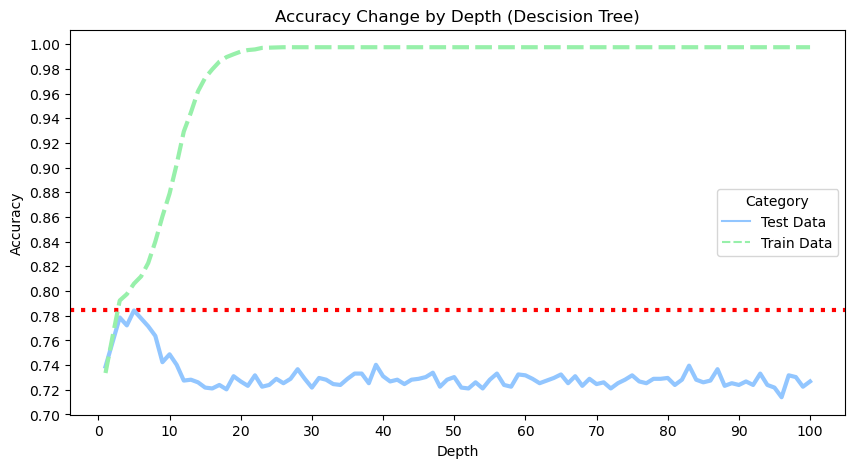

In [111]:
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(DecisionTreedf[DecisionTreedf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][2], color='red', linestyle='dotted', linewidth=3)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))
sns.lineplot(data=DecisionTreedf, x='Depth', y='Accuracy', hue='Category', style='Category', linewidth=3).set_title('Accuracy Change by Depth (Descision Tree)')

In [112]:
# What is the depth of the best accuracy?
Max_DT_Depth = DecisionTreedf[DecisionTreedf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][1]

In [113]:
# Running the algorithm with the best accuracy_score

clf = DecisionTreeClassifier(max_depth = Max_DT_Depth)
    
clf.fit(x_train, y_train) 
    
y_test_pred_DecisionTree = clf.predict(x_test)
    
acc_test_df = accuracy_score(y_test, y_test_pred_DecisionTree)

acc_test_df = "{:.2%}".format(acc_test_df)

print(f"Decision Tree algorithm's best accuracy is {acc_test_df} with depth of {Max_DT_Depth}")


Decision Tree algorithm's best accuracy is 78.42% with depth of 5


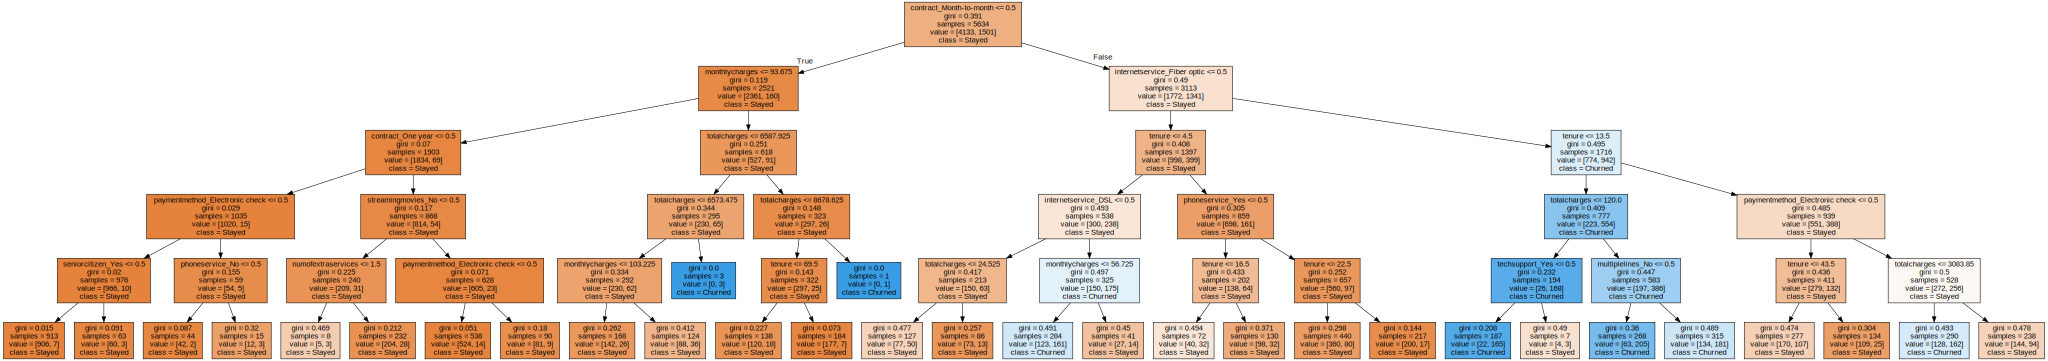

In [114]:
# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# function for plotting decision trees
def plot_tree(tree, features, labels, filename):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled=True))
    graph.format = 'png'
    graph.render(filename, view=True)
    display(SVG(graph.pipe(format='svg')))

# plot the tree and save the image as a PNG file
plot_tree(clf, x_train.columns, ['Stayed', 'Churned'], 'decision_tree.png')

## [10.3] Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

RandomForestdf=pd.DataFrame(columns = ['Category', 'Depth', 'Accuracy'])

for d in range(1 ,101):
    
    model = RandomForestClassifier(n_estimators=101, max_depth=d, random_state=1)
    
    model.fit(x_train, y_train)
    
    y_test_pred_RandomForest = model.predict(x_test)
    
    acc_test_rf = accuracy_score(y_test, y_test_pred_RandomForest)
      
    # append a predicted test row to DataFrame
    RandomForestdf = RandomForestdf.append({'Category' : 'Test Data', 'Depth' : d, 'Accuracy' : acc_test_rf}, ignore_index = True)  
    
    y_train_pred_RandomForest = model.predict(x_train)
    
    acc_train_rf = accuracy_score(y_train, y_train_pred_RandomForest) 
    
    # append a predicted train row to DataFrame
    RandomForestdf = RandomForestdf.append({'Category' : 'Train Data', 'Depth' : d, 'Accuracy' : acc_train_rf}, ignore_index = True) 

In [116]:
# check DataFrame
RandomForestdf

,Category,Depth,Accuracy
0,Test Data,1,0.738822
1,Train Data,1,0.733582
2,Test Data,2,0.766501
3,Train Data,2,0.761093
4,Test Data,3,0.767921
...,...,...,...
195,Train Data,98,0.997338
196,Test Data,99,0.772179
197,Train Data,99,0.997338
198,Test Data,100,0.772179


In [117]:
# check data types
RandomForestdf.dtypes

Category     object
Depth        object
Accuracy    float64
dtype: object

In [118]:
# change Depth's data type to int
RandomForestdf = RandomForestdf.astype({'Depth': 'int64'})

Text(0.5, 1.0, 'Accuracy Change by Depth (Random Forest)')

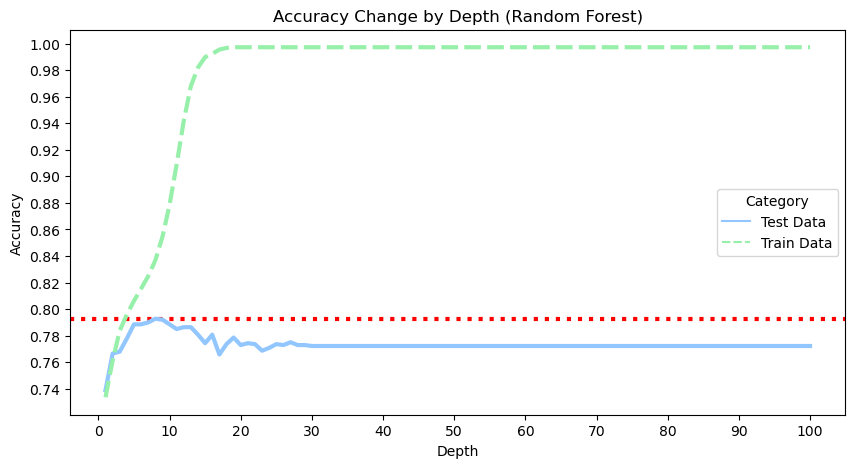

In [119]:
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(RandomForestdf[DecisionTreedf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][2], color='red', linestyle='dotted', linewidth=3)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))
sns.lineplot(data=RandomForestdf, x='Depth', y='Accuracy', hue='Category', style='Category', linewidth=3).set_title('Accuracy Change by Depth (Random Forest)')

In [120]:
# What is the depth of the best accuracy?
Max_RF_Depth = RandomForestdf[RandomForestdf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][1]

In [121]:
# Running the algorithm with the best accuracy

model = RandomForestClassifier(n_estimators=101, max_depth=Max_RF_Depth, random_state=1)
    
model.fit(x_train, y_train)
    
y_test_pred_RandomForest = model.predict(x_test)
    
acc_test_rf = accuracy_score(y_test, y_test_pred_RandomForest)

acc_test_rf = "{:.2%}".format(acc_test_rf)

print(f"Random Forest algorithm's best accuracy is {acc_test_rf} with depth of {Max_RF_Depth}")

Random Forest algorithm's best accuracy is 79.28% with depth of 8


In [122]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.14012513, 0.078467  , 0.11783639, 0.01220655, 0.01522639,
       0.05925494, 0.02197111, 0.1289928 , 0.02108902, 0.04079746,
       0.00260736, 0.00487919, 0.04926407, 0.00391616, 0.00216334,
       0.01315318, 0.01631301, 0.01607349, 0.01478122, 0.01956061,
       0.00576897, 0.00515036, 0.00664091, 0.00667028, 0.00621333,
       0.00506957, 0.00592342, 0.00689481, 0.00236489, 0.00214473,
       0.00671593, 0.00722801, 0.01274708, 0.01432706, 0.00682487,
       0.00539446, 0.00317237, 0.00357944, 0.00927897, 0.00866485,
       0.00567596, 0.00571624, 0.0049603 , 0.00330837, 0.01135749,
       0.01321292, 0.00234615, 0.00215152, 0.0061538 , 0.02571187,
       0.00995265])

In [123]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # sorting the data frame

,feature,importance
0,tenure,0.140125
7,contract_Month-to-month,0.128993
2,totalcharges,0.117836
1,monthlycharges,0.078467
5,internetservice_Fiber optic,0.059255
12,paymentmethod_Electronic check,0.049264
9,contract_Two year,0.040797
49,paymentgroup_Overpaid,0.025712
6,internetservice_No,0.021971
8,contract_One year,0.021089


In [124]:
# If we'll sum all the imprtance we'll get 100% (each feature and its importance percentage)
stats.importance.sum()

1.0

Text(0.5, 1.0, 'Top 10 Features by Importance')

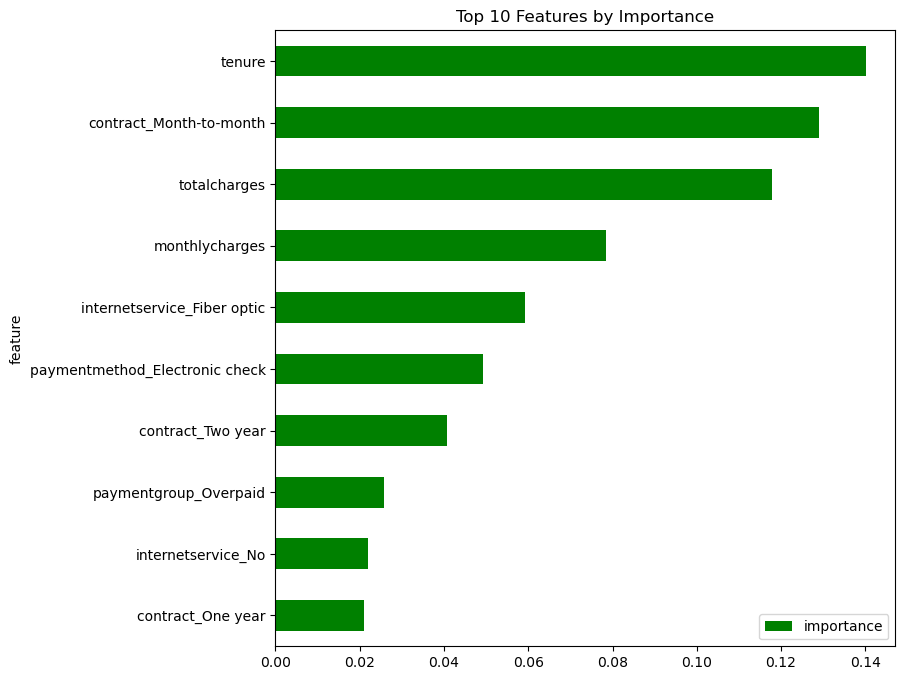

In [125]:
stats1 = stats.nlargest(10, 'importance', keep = 'all')
stats1_sort = stats1.sort_values('importance', ascending=True)
    
plt.rcParams["figure.figsize"] = (8,8)

stats1_sort.plot(y='importance', x='feature', kind='barh', color='green')    
        
plt.title('Top 10 Features by Importance')

Text(0.5, 1.0, 'Bottom 10 Features by Importance')

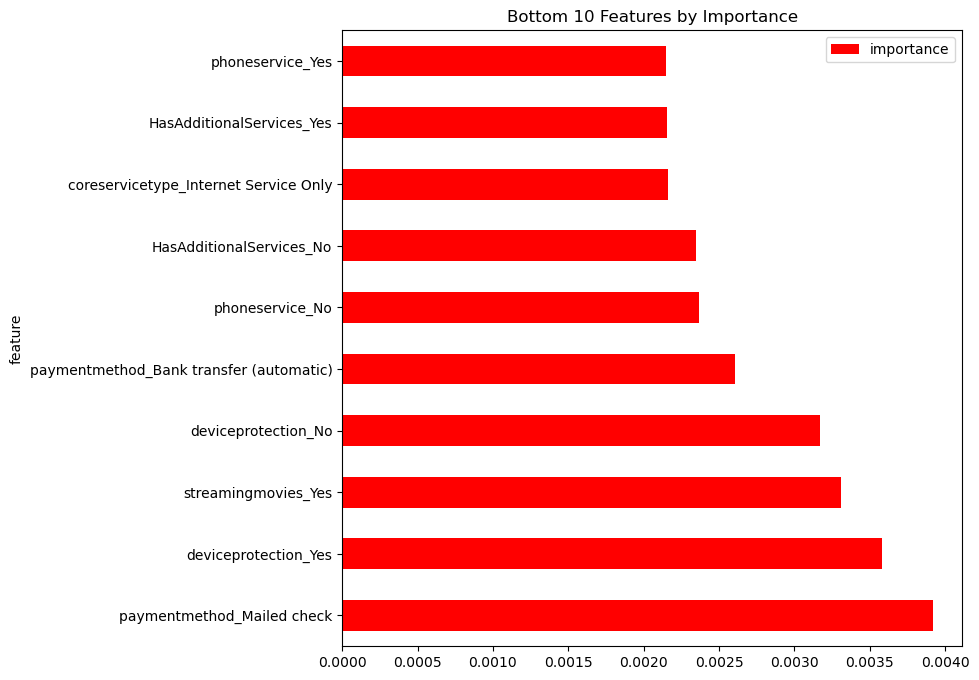

In [126]:
stats2 = stats.nsmallest(10, 'importance', keep = 'all')
stats2_sort = stats2.sort_values('importance', ascending=False)
    
plt.rcParams["figure.figsize"] = (8,8)

stats2_sort.plot(y='importance', x='feature', kind='barh', color='red')    
        
plt.title('Bottom 10 Features by Importance')

## [10.4] KNN - K Nearest Neighbors

### [10.4.1] Non-standardized

In [127]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

KNNdf=pd.DataFrame(columns = ['Category', 'K-Neighbors', 'Accuracy'])

for k in range(1 ,101):
    
    clf = KNeighborsClassifier(n_neighbors = k)
    
    clf.fit(x_train, y_train) 
    
    y_test_pred_knn = clf.predict(x_test)
    
    acc_test_knn = accuracy_score(y_test, y_test_pred_knn)
    
    # append a predicted test row to DataFrame
    KNNdf = KNNdf.append({'Category' : 'Test Data', 'K-Neighbors' : k, 'Accuracy' : acc_test_knn}, ignore_index = True)

    y_train_pred_knn = clf.predict(x_train)
    
    acc_train_knn = accuracy_score(y_train, y_train_pred_knn)
    
    # append a predicted train row to DataFrame
    KNNdf = KNNdf.append({'Category' : 'Train Data', 'K-Neighbors' : k, 'Accuracy' : acc_train_knn}, ignore_index = True)

KeyboardInterrupt: 

In [ ]:
# check DataFrame
KNNdf

In [ ]:
# check data types
KNNdf.dtypes

In [ ]:
# change Depth's data type to int
KNNdf = KNNdf.astype({'K-Neighbors': 'int64'})

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(KNNdf[KNNdf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][2], color='red', linestyle='dotted', linewidth=3)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))
sns.lineplot(data=KNNdf, x='K-Neighbors', y='Accuracy', hue='Category', style='Category', linewidth=3).set_title('Accuracy Change by K-Neighbors (KNN non-standardized)')

In [ ]:
# What is the no. of neighbors of the best accuracy?
Max_KNN_Neighbors = KNNdf[KNNdf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][1]

In [ ]:
# Running the algorithm with the best accuracy_score

clf = KNeighborsClassifier(n_neighbors = Max_KNN_Neighbors)
    
clf.fit(x_train, y_train) 
    
y_test_pred_knn = clf.predict(x_test)
    
acc_test_knn_U = accuracy_score(y_test, y_test_pred_knn)

acc_test_knn_U = "{:.2%}".format(acc_test_knn_U)

print(f"KNN (non-standardized) algorithm's best accuracy is {acc_test_knn_U} with {Max_KNN_Neighbors} neighbors")

### [10.4.2] Standardized

In [ ]:
from sklearn.preprocessing import StandardScaler # import the libraries
scaler = StandardScaler() # define
x_train_scaled = scaler.fit_transform(x_train) # fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # perform standardization by centering and scaling

In [ ]:
KNN_sdf=pd.DataFrame(columns = ['Category', 'K-Neighbors', 'Accuracy'])

for k in range(1 ,101):
    
    clf = KNeighborsClassifier(n_neighbors = k)
    
    clf.fit(x_train_scaled, y_train) 
    
    y_test_pred_knn = clf.predict(x_test_scaled)
    
    acc_test_knn = accuracy_score(y_test, y_test_pred_knn)
    
    # append a predicted test row to DataFrame
    KNN_sdf = KNN_sdf.append({'Category' : 'Test Data', 'K-Neighbors' : k, 'Accuracy' : acc_test_knn}, ignore_index = True)

    y_train_pred_knn = clf.predict(x_train_scaled)
    
    acc_train_knn = accuracy_score(y_train, y_train_pred_knn)
    
    # append a predicted train row to DataFrame
    KNN_sdf = KNN_sdf.append({'Category' : 'Train Data', 'K-Neighbors' : k, 'Accuracy' : acc_train_knn}, ignore_index = True)

In [ ]:
# check DataFrame
KNN_sdf

In [ ]:
# check data types
KNN_sdf.dtypes

In [ ]:
# change Depth's data type to int
KNN_sdf = KNN_sdf.astype({'K-Neighbors': 'int64'})

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(KNN_sdf[KNN_sdf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][2], color='red', linestyle='dotted', linewidth=3)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.02))
sns.lineplot(data=KNN_sdf, x='K-Neighbors', y='Accuracy', hue='Category', style='Category', linewidth=3).set_title('Accuracy Change by K-Neighbors (KNN Standardized)')

In [ ]:
# What is the no. of neighbors of the best accuracy?
Max_KNN_Neighbors_s = KNN_sdf[KNN_sdf['Category']=='Test Data'].sort_values(by='Accuracy', ascending=False).values[0][1]

In [ ]:
# Running the algorithm with the best accuracy_score

clf = KNeighborsClassifier(n_neighbors = Max_KNN_Neighbors_s)
    
clf.fit(x_train_scaled, y_train) 
    
y_test_pred_knn = clf.predict(x_test_scaled)
    
acc_test_knn_s = accuracy_score(y_test, y_test_pred_knn)

acc_test_knn_s = "{:.2%}".format(acc_test_knn_s)

print(f"KNN (standardized) algorithm's best accuracy is {acc_test_knn_s} with {Max_KNN_Neighbors_s} neighbors")

## [10.5] Summary

In [ ]:
# let's see what would be the prediction of a primitive algorithm (this is out reference point because we want to improve the prediction)

def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    
benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basically, our benchmark predicts, always 0 (zero) --> Stayed

test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc = "{:.2%}".format(test_acc)

In [ ]:
print(f"Benchmark algorithm's best accuracy is {test_acc}")

In [ ]:
print(f"Decision Tree algorithm's best accuracy is {acc_test_df} with depth of {Max_DT_Depth}")
print(f"Random Forest algorithm's best accuracy is {acc_test_rf} with depth of {Max_RF_Depth}")
print(f"KNN (non-standardized) algorithm's best accuracy is {acc_test_knn_U} with {Max_KNN_Neighbors} neighbors")
print(f"KNN (standardized) algorithm's best accuracy is {acc_test_knn_s} with {Max_KNN_Neighbors_s} neighbors")